#  Ridge and Quantile Regressions

# 1. Dataset ‘blood.xlsx’ (X1 = systolic blood pressure (dependent variable), X2 = patient's age in years, X3 = weight in pounds (two independent variables)):

- Build a ridge regression model for X1 as a function of X2 and X3. Use the functions cv.plot and bias.plot to find the parameter k.

- Check for multicollinearity of the data.

- Check the significance of the constructed regression equation.

- Carry out comparative analysis of the obtained model with the linear regression model (when estimates are found by MLS).

In [1]:
library(readxl)
read_excel('../data/blood.xlsx',) -> bloodPatients

bloodPatients = na.omit(bloodPatients)

library(dplyr)
glimpse(bloodPatients)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 11
Columns: 3
$ X1 <dbl> 132, 143, 153, 162, 154, 168, 137, 149, 159, 128, 166
$ X2 <dbl> 52, 59, 67, 73, 64, 74, 54, 61, 65, 46, 72
$ X3 <dbl> 173, 184, 194, 211, 196, 220, 188, 188, 207, 167, 217


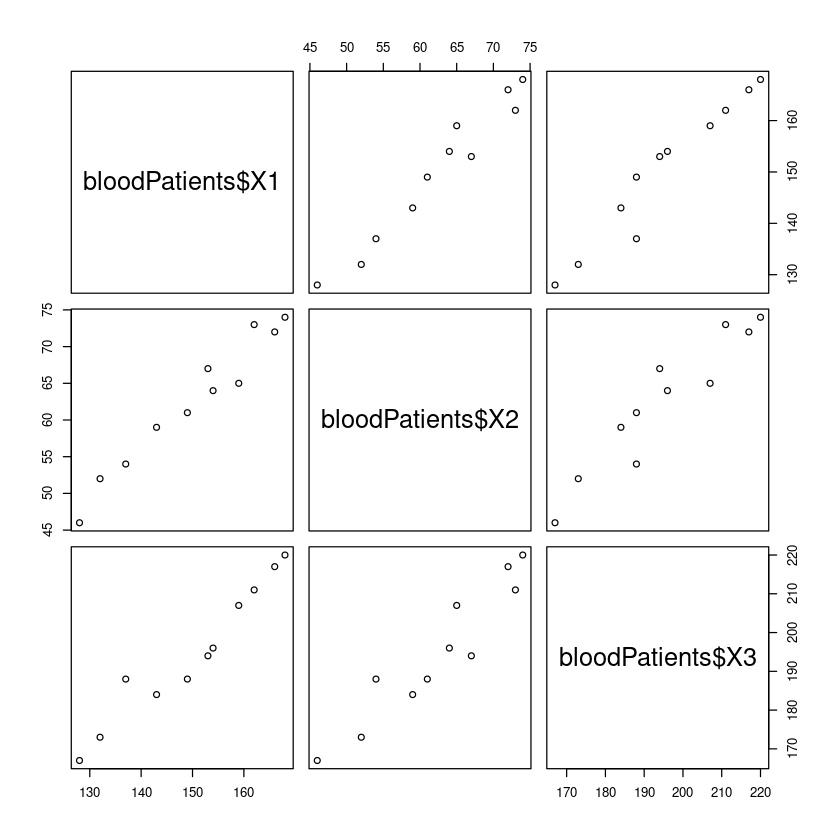

In [20]:
pairs(bloodPatients$X1 ~ bloodPatients$X2 + bloodPatients$X3)

### Linear regression using MSE method

In [16]:
fit1 = lm(X1 ~ ., bloodPatients)
summary(fit1)


Call:
lm(formula = X1 ~ ., data = bloodPatients)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4640 -1.1949 -0.4078  1.8511  2.6981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  30.9941    11.9438   2.595  0.03186 * 
X2            0.8614     0.2482   3.470  0.00844 **
X3            0.3349     0.1307   2.563  0.03351 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.318 on 8 degrees of freedom
Multiple R-squared:  0.9768,	Adjusted R-squared:  0.9711 
F-statistic: 168.8 on 2 and 8 DF,  p-value: 2.874e-07


In [43]:
library(car)
vif(fit1)
# it is less than 10

X2       X3 
9.525022 9.525022

## Ridge regression model

- значение GCV при $\lambda = 0.56$ предлагает использовать небольшую регуляризацию для улучшения качества модели.
- автоматическая выбранная $\lambda = 0.004737444$

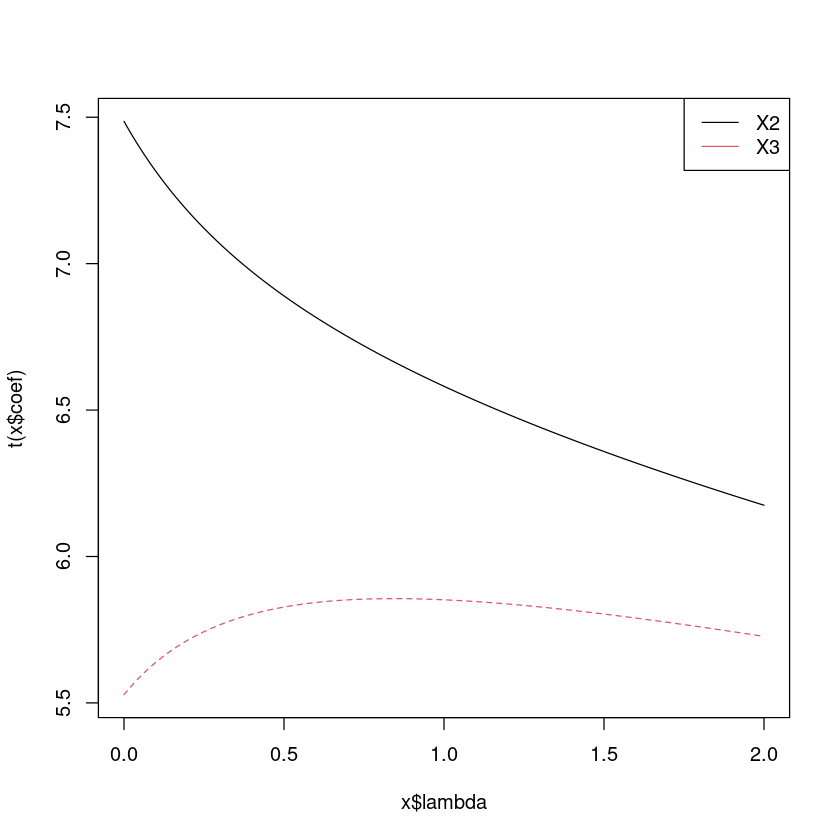

In [10]:
library(MASS)
fit2 = lm.ridge(X1~ .,
    bloodPatients, 

    #последовательность от 0 до 2 с шагом 0.001
    lambda = seq(0, 2, by = 0.001) 
)
plot(fit2) # значение лямбды от коэф регрессии
legend("topright", legend = colnames(bloodPatients)[-1], lty = 1, col = 1:length(fit2$coef))





In [12]:
# выбор лучшего значения лямбды
select(lm.ridge(
                X1~.,
                bloodPatients,
                lambda = seq(0,2,by=0.01)))


modified HKB estimator is 0 
modified L-W estimator is 0 
smallest value of GCV  at 0.56 


### Ridge regression with manually lambda -> fit5 (and fit3 with library mass)

In [14]:
fit3 <- lm.ridge(X1~.,bloodPatients,lambda = 0.56)
fit3

library(ridge)
fit5 = linearRidge(X1 ~ ., bloodPatients,lambda = 0.56)
summary(fit5)

                   X2         X3 
31.9476379  0.7876384  0.3535983 


Call:
linearRidge(formula = X1 ~ ., data = bloodPatients, lambda = 0.56)


Coefficients:
            Estimate Scaled estimate Std. Error (scaled) t value (scaled)
(Intercept)  54.4895              NA                  NA               NA
X2            0.5914         17.0441              1.7555            9.709
X3            0.3009         16.4736              1.7555            9.384
            Pr(>|t|)    
(Intercept)       NA    
X2            <2e-16 ***
X3            <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Ridge parameter: 0.56

Degrees of freedom: model 0.8644 , variance 0.6107 , residual 1.118 


### Ridge regression with automatically choosen lambda -> fit4

In [17]:
library(ridge)
fit4 = linearRidge(X1 ~ ., bloodPatients)
summary(fit4)


Call:
linearRidge(formula = X1 ~ ., data = bloodPatients)


Coefficients:
            Estimate Scaled estimate Std. Error (scaled) t value (scaled)
(Intercept)  30.9289              NA                  NA               NA
X2            0.8505         24.5135              6.2148            3.944
X3            0.3387         18.5445              6.2148            2.984
            Pr(>|t|)    
(Intercept)       NA    
X2             8e-05 ***
X3           0.00285 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Ridge parameter: 0.004737444, chosen automatically, computed using 1 PCs

Degrees of freedom: model 1.917 , variance 1.84 , residual 1.993 


## Compare Models

In [38]:
bloodPredictedFit1 <- predict(fit1,bloodPatients) #linear reg
compareFit1 <- cbind(actual = bloodPatients$X1, bloodPredictedFit1) #make table
show(compare)

accuracyFit1 = mean(apply(compareFit1,1,min)/apply(compareFit1,1,max))
accuracyFit1
# в среднем предсказанные значения отличаются от реальных всего на 1.1%


   actual bloodPredictedFit1
1     132           133.7183
2     143           143.4317
3     153           153.6716
4     162           164.5327
5     154           151.7570
6     168           168.4078
7     137           140.4640
8     149           146.4939
9     159           156.3019
10    128           126.5407
11    166           165.6804


[1] 0.9886923

In [36]:
# Ridge regression with 0.004737444, chosen automatically
bloodPredictedFit4 <- predict(fit4, bloodPatients)
compareFit4 <- cbind(actual=bloodPatients$X1,  bloodPredictedFit4)
show(compareFit4)

accuracyFit4 = mean(apply(compareFit4,1,min)/apply(compareFit4,1,max))
accuracyFit4


   actual bloodPredictedFit4
1     132           133.7481
2     143           143.4272
3     153           153.6181
4     162           164.4789
5     154           151.7440
6     168           168.3776
7     137           140.5295
8     149           146.4830
9     159           156.3201
10    128           126.6130
11    166           165.6605


[1] 0.9887473

In [40]:
# Ridge regression with manually setted as 0.56
bloodPredictedFit5 <- predict(fit5, bloodPatients)
compareFit5 <- cbind(actual=bloodPatients$X1,  bloodPredictedFit5)
show(compareFit5)

accuracyFit5 = mean(apply(compareFit5,1,min)/apply(compareFit5,1,max))
accuracyFit5


   actual bloodPredictedFit5
1     132           137.2896
2     143           144.7385
3     153           152.4780
4     162           161.1408
5     154           151.3057
6     168           164.4400
7     137           142.9852
8     149           147.1247
9     159           155.2066
10    128           131.9362
11    166           162.3547


[1] 0.9792692

In [39]:
max(accuracyFit1, accuracyFit4, accuracyFit5)

[1] 0.9887473

# 2. Dataset ‘Kuiper.xls’ (price - dependent variable, mileage, liter, cruise, sound, leather - independent variables):

- Construct quantile regression for different values of parameters ‘tau’, Y = price - dependent variable, mileage, liter, cruise, sound, leather leather - independent variables).

- Graph the results.

- Construct a linear regression model and compare this model with the median regression model.

In [50]:
library(readxl)
read_excel('../data/kuiper.xls',) -> cars_data
cars_data = na.omit(cars_data)

library(dplyr)
glimpse(cars_data)
# Оставляем только столбцы 
cars_data_subset = subset(cars_data,select = c(Price,Mileage,Liter,Cruise,Sound,Leather))

glimpse(cars_data_subset)

Rows: 804
Columns: 12
$ Price    <dbl> 17314.10, 17542.04, 16218.85, 16336.91, 16339.17, 15709.05, 1…
$ Mileage  <dbl> 8221, 9135, 13196, 16342, 19832, 22236, 22576, 22964, 24021, …
$ Make     <chr> "Buick", "Buick", "Buick", "Buick", "Buick", "Buick", "Buick"…
$ Model    <chr> "Century", "Century", "Century", "Century", "Century", "Centu…
$ Trim     <chr> "Sedan 4D", "Sedan 4D", "Sedan 4D", "Sedan 4D", "Sedan 4D", "…
$ Type     <chr> "Sedan", "Sedan", "Sedan", "Sedan", "Sedan", "Sedan", "Sedan"…
$ Cylinder <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6…
$ Liter    <dbl> 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.6, 3.6, 3…
$ Doors    <dbl> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Sound    <dbl> 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1…
$ Leather  <dbl> 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0…
Rows: 804
Columns:

In [51]:
cars_data_subset = subset(cars_data,select = c(Price,Mileage,Liter,Cruise,Sound,Leather))
fit1 = lm(Price~.,cars_data_subset)
summary(fit1)


Call:
lm(formula = Price ~ ., data = cars_data_subset)

Residuals:
   Min     1Q Median     3Q    Max 
-12328  -5660  -1700   4546  38203 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.318e+03  1.184e+03   6.182 1.01e-09 ***
Mileage     -1.744e-01  3.265e-02  -5.342 1.20e-07 ***
Liter        3.864e+03  2.636e+02  14.658  < 2e-16 ***
Cruise       6.251e+03  6.741e+02   9.273  < 2e-16 ***
Sound       -2.126e+03  5.832e+02  -3.646 0.000284 ***
Leather      3.436e+03  6.121e+02   5.613 2.74e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7574 on 798 degrees of freedom
Multiple R-squared:  0.4165,	Adjusted R-squared:  0.4129 
F-statistic: 113.9 on 5 and 798 DF,  p-value: < 2.2e-16


In [41]:
library(SparseM)
library(quantreg)
fit2<- rq(formula = Price~.,
            tau=2:8/10, #( \tau = 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 )
            data = cars_data_subset,)
summary(fit2)

Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”



Call: rq(formula = Price ~ ., tau = 2:8/10, data = cars_data_subset)

tau: [1] 0.2

Coefficients:
            coefficients lower bd    upper bd   
(Intercept)  6942.50069   5459.65065  7296.08236
Mileage        -0.11506     -0.13654    -0.09319
Liter        3594.64481   3378.81399  3868.56366
Cruise        542.71312    333.14546   928.59901
Sound        -769.24211  -1145.59397  -171.74786
Leather       509.06156    228.23340   909.23020

Call: rq(formula = Price ~ ., tau = 2:8/10, data = cars_data_subset)

tau: [1] 0.3

Coefficients:
            coefficients lower bd    upper bd   
(Intercept)  6913.54754   6300.53997  7468.35597
Mileage        -0.12293     -0.14090    -0.10745
Liter        3793.26932   3586.63649  3941.50503
Cruise        924.61467    665.72890  1134.85978
Sound        -971.47254  -1297.00791  -644.73647
Leather       603.48569    362.15424  1019.67261

Call: rq(formula = Price ~ ., tau = 2:8/10, data = cars_data_subset)

tau: [1] 0.4

Coefficients:
            coeff

Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”


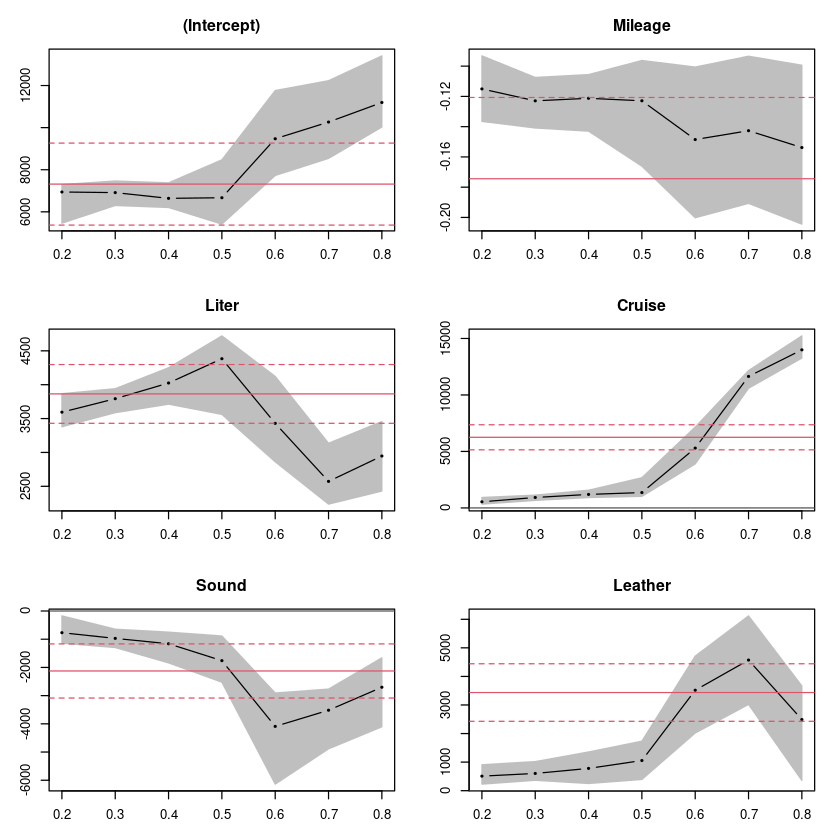

In [27]:
plot(summary(fit2))

# при всех прочих равных нулю цена машины это intercept
# для более высоких квантилей цен , базовая цена авто растет 

### Predictions 

In [62]:
carsPredictedFit1 <- predict(fit1,cars_data_subset)
carsPredictedFit2 <- predict(fit2,cars_data_subset)
cars.compare.ql = cbind(actual=cars_data_subset$Price,carsPredictedFit1,carsPredictedFit2)
head(cars.compare.ql,5)

,actual,carsPredictedFit1,tau= 0.2,tau= 0.3,tau= 0.4,tau= 0.5,tau= 0.6,tau= 0.7,tau= 0.8
1,17314.10,25423.85,17422.54,18218.67,18935.15,19905.50,23605.93,29762.30,32847.80
2,17542.04,21828.63,16808.32,17502.83,18044.62,18737.59,19953.46,25059.63,30216.68
3,16218.85,21120.36,16341.07,17003.59,17552.22,18238.51,19350.35,24480.25,29592.08
4,16336.91,22698.11,16748.34,17588.31,18332.59,19612.17,22973.67,27549.40,31811.08
5,16339.17,25525.24,16855.85,17762.76,18689.13,20238.86,25972.10,31623.76,33764.86


Warning message in rq.fit.br(x, y, tau = tau, ...):
“Solution may be nonunique”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


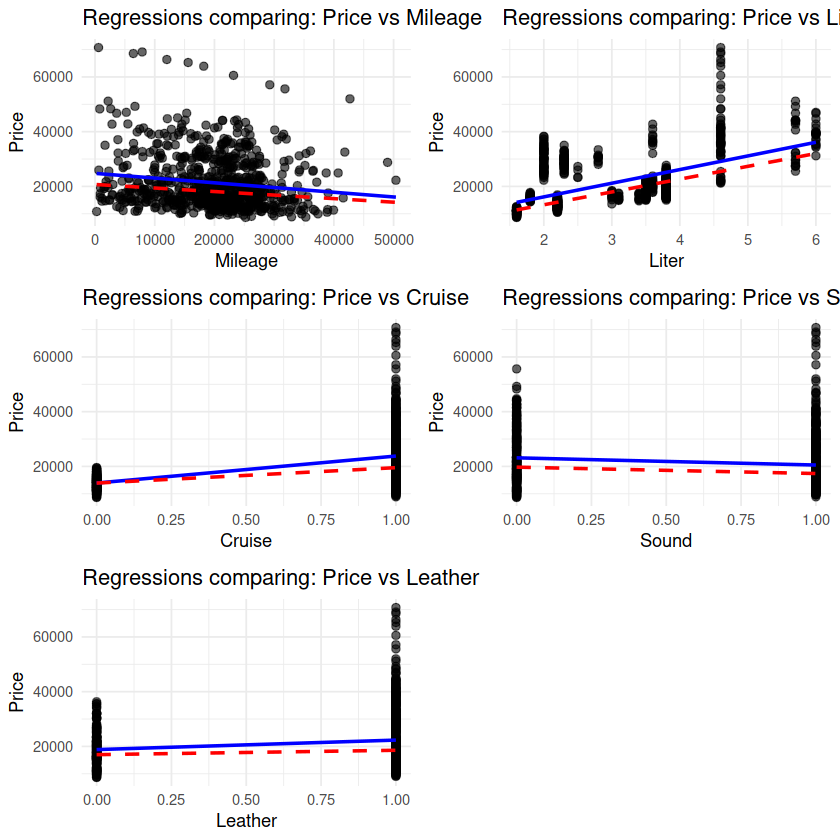

In [52]:
library(ggplot2)
library(SparseM)
library(quantreg)



# Медианная регрессия (tau = 0.5)
fit2 <- rq(formula = Price ~ ., tau = 0.5, data = cars_data_subset)

# Предсказания для линейной и медианной регрессии
cars_data_subset$pred_lm <- predict(fit1, newdata = cars_data_subset)
cars_data_subset$pred_rq <- predict(fit2, newdata = cars_data_subset)

# Список предикторов (переменных) для построения графиков
predictors <- c("Mileage", "Liter", "Cruise", "Sound", "Leather")

# Построение графиков для каждой переменной
plots <- list()
for (variable in predictors) {
  p <- ggplot(cars_data_subset, aes_string(x = variable, y = "Price")) +
    geom_point(color = "black", alpha = 0.6, size = 2) + # Исходные точки
    geom_smooth(aes(y = pred_lm), method = "lm", color = "blue", linetype = "solid", se = FALSE) + # Линейная регрессия
    geom_smooth(aes(y = pred_rq), method = "lm", color = "red", linetype = "dashed", se = FALSE) + # Медианная регрессия
    labs(title = paste("Regressions comparing: Price vs", variable),
         x = variable,
         y = "Price") +
    theme_minimal() +
    theme(legend.position = "none")
  
  plots[[variable]] <- p
}

# Вывод всех графиков
library(gridExtra)
do.call(grid.arrange, c(plots, ncol = 2))


# 3. Dataset ‘cigarettes.txt’: (column variables: carbon monoxide, tar, nicotine, weight):

- Build several nonlinear (quadratic and cubic) regression models with dependent variable y=carbon monoxide, and independent variables: x1=tar, x2=nicotine, x3=weight. 

- Construct a linear regression model and compare this model with non-linear regression models.

----------------------------------------


- V1: Company name
- V2: x1=tar (mg)
- V3: x2=nicotine (mg)
- V4: x3=weight (g)
- V5: y=carbon monoxide (mg)


In [54]:
read.table('../data/cigarettes.dat.txt',header = FALSE,
           dec = '.',na.strings = 'NA') -> cigarettes
# Добавляем имена столбцов
colnames(cigarettes) <- c("Company", "Tar", "Nicotine", "Weight", "CarbonMonoxide")

head(cigarettes)

,Company,Tar,Nicotine,Weight,CarbonMonoxide
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alpine,14.1,0.86,0.9853,13.6
2,Benson&Hedges,16.0,1.06,1.0938,16.6
3,BullDurham,29.8,2.03,1.1650,23.5
4,CamelLights,8.0,0.67,0.9280,10.2
5,Carlton,4.1,0.40,0.9462,5.4
6,Chesterfield,15.0,1.04,0.8885,15.0


In [55]:
# Линейная регрессия
linear_model <- lm(CarbonMonoxide ~ Tar + Nicotine + Weight, data = cigarettes)

# Результаты линейной модели
summary(linear_model)


Call:
lm(formula = CarbonMonoxide ~ Tar + Nicotine + Weight, data = cigarettes)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89261 -0.78269  0.00428  0.92891  2.45082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2022     3.4618   0.925 0.365464    
Tar           0.9626     0.2422   3.974 0.000692 ***
Nicotine     -2.6317     3.9006  -0.675 0.507234    
Weight       -0.1305     3.8853  -0.034 0.973527    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.446 on 21 degrees of freedom
Multiple R-squared:  0.9186,	Adjusted R-squared:  0.907 
F-statistic: 78.98 on 3 and 21 DF,  p-value: 1.329e-11


In [56]:
# Квадратичная регрессия
quadratic_model <- lm(CarbonMonoxide ~ Tar + I(Tar^2) +
                                   Nicotine + I(Nicotine^2) +
                                   Weight + I(Weight^2), data = cigarettes)

# Результаты квадратичной модели
summary(quadratic_model)



Call:
lm(formula = CarbonMonoxide ~ Tar + I(Tar^2) + Nicotine + I(Nicotine^2) + 
    Weight + I(Weight^2), data = cigarettes)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9801 -0.7647 -0.1008  0.7444  2.2039 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)   -18.00574   34.58237  -0.521    0.609
Tar             1.76327    1.33550   1.320    0.203
I(Tar^2)       -0.03334    0.05032  -0.663    0.516
Nicotine      -10.78600   23.66215  -0.456    0.654
I(Nicotine^2)   5.13704   12.26288   0.419    0.680
Weight         40.33034   74.12597   0.544    0.593
I(Weight^2)   -20.28345   37.51022  -0.541    0.595

Residual standard error: 1.23 on 18 degrees of freedom
Multiple R-squared:  0.9495,	Adjusted R-squared:  0.9327 
F-statistic: 56.42 on 6 and 18 DF,  p-value: 1.068e-10


In [57]:
# Кубическая регрессия
cubic_model <- lm(CarbonMonoxide ~ Tar + I(Tar^2) + I(Tar^3) +
                                Nicotine + I(Nicotine^2) + I(Nicotine^3) +
                                Weight + I(Weight^2) + I(Weight^3), 
                                data = cigarettes)

# Результаты кубической модели
summary(cubic_model)



Call:
lm(formula = CarbonMonoxide ~ Tar + I(Tar^2) + I(Tar^3) + Nicotine + 
    I(Nicotine^2) + I(Nicotine^3) + Weight + I(Weight^2) + I(Weight^3), 
    data = cigarettes)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03207 -0.82967 -0.05909  0.95852  2.13849 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)   -3.258e+01  6.348e+02  -0.051    0.960
Tar            3.880e-01  4.940e+00   0.079    0.938
I(Tar^2)       8.015e-02  4.241e-01   0.189    0.853
I(Tar^3)      -3.007e-03  1.185e-02  -0.254    0.803
Nicotine       1.164e+01  1.010e+02   0.115    0.910
I(Nicotine^2) -2.036e+01  1.182e+02  -0.172    0.866
I(Nicotine^3)  9.588e+00  4.514e+01   0.212    0.835
Weight         8.549e+01  1.981e+03   0.043    0.966
I(Weight^2)   -7.111e+01  2.024e+03  -0.035    0.972
I(Weight^3)    1.897e+01  6.866e+02   0.028    0.978

Residual standard error: 1.338 on 15 degrees of freedom
Multiple R-squared:  0.9502,	Adjusted R-squared:  0.9204 
F-statisti

In [73]:
cat("Linear Model R²:", summary(linear_model)$r.squared, "\n")
cat("Quadratic Model R²:", summary(quadratic_model)$r.squared, "\n")
cat("Cubic Model R²:", summary(cubic_model)$r.squared, "\n")


Linear Model R²: 0.9185893 
Quadratic Model R²: 0.9495132 
Cubic Model R²: 0.9502268 


In [74]:
# Функция для расчёта MSE
mse <- function(actual, predicted) {
  mean((actual - predicted)^2)
}

# Рассчитываем MSE для каждой модели
mse_linear <- mse(cigarettes$CarbonMonoxide, predict(linear_model))
mse_quadratic <- mse(cigarettes$CarbonMonoxide, predict(quadratic_model))
mse_cubic <- mse(cigarettes$CarbonMonoxide, predict(cubic_model))

cat("Linear Model MSE:", mse_linear, "\n")
cat("Quadratic Model MSE:", mse_quadratic, "\n")
cat("Cubic Model MSE:", mse_cubic, "\n")


Linear Model MSE: 1.755703 
Quadratic Model MSE: 1.088798 
Cubic Model MSE: 1.07341 
